# Data Analysis
 


In [1]:
#%matplotlib nbagg
from __future__ import division
from IPython.display import HTML
from IPython.display import display
from scipy.optimize import *
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.special import erf

import pandas
from pandas.plotting import lag_plot



## 1 Interpreting a measurement

Recently a paper was published [B. Abi _et al._ Phys. Rev. Lett. **126** 141801 (2021)] reporting the muon's anomalous magnetic moment; in this question we analyse some of the  statements  from  the publication.

> (i) One of the quantities of interest, $R$, is reported as $R=(37\,073\,003\pm16\pm6)\times 10^{-11}$, "where the first error is statistical and the second is systematic".  Explain briefly what you understand by the terms  "statistical" and "systematic errors".

> (ii) One of the fits produces a $\chi^2$ value of 6.8, with 3 degrees of freedom.  Evaluate the probability of obtaining this  value of  $\chi^2$, or larger, for 3 degrees of freedom assuming the model describing the data is consistent with the hypothesis. Interpret your result.

> (iii) The quantity of interest is $a_{\mu}$, the anomaly, a dimensionless quantity. The difference between the experimentally measured anomaly  and the theoretical prediction is reported as $a_{\mu}({\rm exp)}-a_{\mu}({\rm theory})= (251\pm59)\times 10^{-11}$, "which has a significance of 4.2$\sigma$". Assuming the distribution is well described by a Gaussian, what is the probability of obtaining a difference of 4.2$\sigma$ or more?

> (iv) Rather than using the conventional error bar with 68.3% confidence limit, it is decided to report the 90.0% confidence limit interval.  Write the difference between the experimentally measured anomaly  and the theoretical prediction with this interval.

In [2]:
print(r'''(i): 

-Statistical Errors: are the amount by which an observation differs from its expected value, in this case statistical error 
 stems from parity violation in μ+ decay, It comes from unpredictable changes during an experiment.
     
-Systematic Errors: are usually caused by measuring instruments that are incorrectly calibrated or are used incorrectly
 it could be one these three: Zero, Calibration Error and Insertion Error, in this case NMR calibration procedure 
 (indicated by fcalib and water at the reference temperature 34.7°C)
 temperature and magnetization of probe materials to an uncertainty of 15 ppb. and then for the Run-1 there was a Damage to two of the 32 ESQ high-voltage resistors.''')
print()

p_value= 1 - stats.chi2.cdf(x=6.8, df=3)
p_value_python="{:.2f}".format(float(1 - stats.chi2.cdf(x=6.8, df=3)))

def truncate(f, n):
    return (math.floor(f * 10 ** n) / 10 ** n)

print(f'(ii):\n -the probability is:  {"{:.2f}".format(p_value)} or 8% , in the article: {truncate(p_value, 3)}  or {truncate(p_value, 3)*100}% \n it means the probability under the null hypothesis of getting observed value of the test statistics or something larger, hence, p>0.05 is that means the null hypothesis is true or the Null Hypothesis is not rejected\n')

Z = 1.41865 # calculated z score from p value.
one_three= 1 - stats.chi2.cdf(x=3+4.2*np.sqrt(6), df=3)
print(f'(iii): the probability is {"{:.3f}".format(one_three)}')

r=0.00000000251
dof=3
s=np.sqrt(r/dof) #standard deviation
SE=s/np.sqrt(dof) #standard error
one_four=SE*1.65

print(f'(iv): 90% confidence error = (mean+1.65*SE,mean-1.65*SE) or (mean+{"{:.5f}".format(one_four)},mean-{"{:.5f}".format(one_four)})')

#print(stats.chi2.ppf(0.922,df=3))

(i): 

-Statistical Errors: are the amount by which an observation differs from its expected value, in this case statistical error 
 stems from parity violation in μ+ decay, It comes from unpredictable changes during an experiment.
     
-Systematic Errors: are usually caused by measuring instruments that are incorrectly calibrated or are used incorrectly
 it could be one these three: Zero, Calibration Error and Insertion Error, in this case NMR calibration procedure 
 (indicated by fcalib and water at the reference temperature 34.7°C)
 temperature and magnetization of probe materials to an uncertainty of 15 ppb. and then for the Run-1 there was a Damage to two of the 32 ESQ high-voltage resistors.

(ii):
 -the probability is:  0.08 or 8% , in the article: 0.078  or 7.8% 
 it means the probability under the null hypothesis of getting observed value of the test statistics or something larger, hence, p>0.05 is that means the null hypothesis is true or the Null Hypothesis is not rejected


## 2 Linear regression

Data  collected in an experiment to measure the focal length, $f$, of a lens are listed below.  The independent variable is the object distance, denoted $x$, and the dependent variable is the image distance, denoted $y$.  There are error bars for $y$, $\alpha_y$,  but not for $x$. 

The equation that relates these variables is 

$$\displaystyle{\frac{1}{x}+\frac{1}{y}=\frac{1}{f}.}$$

Define new variables $X$ and $Y$, where $X\equiv1/x$ and $Y\equiv 1/y$. Perform linear regression for $Y$ (and its associated error) as a function of $X$.

> (i)  Calculate the slope, $Y$-intercept, and $X$-intercept of the best-fit straight line to the data, and their associated errors.

> (ii) The  $X$-intercept is equal to $1/f$. Hence deduce $f$ and its error.

> (iii) The  $Y$-intercept is equal to $1/f$. Hence deduce $f$ and its error.

> (iv) What is the value of $f$ that should be quoted?

(i):
Slope: -1.0 and Slope Error: 0.2
 Y-Intercept: 0.04000 and Y-Intercept Error: 0.00004
 X-Intercept: 0.0400 and X-Intercept Error: 0.0001
 y-Intercept: 104.6 and y-Intercept Error: 9.6
 x-Intercept 113.1 and x-Intercept error 22.1

(ii): 
 f is between 25.0722315690263 and 24.947309378273086, AlphaF plus= 0.062305102750752184 and AlphaF minus= 0.06261708800246168
 
--> F= 25.01 , and ErrorOnF= 0.06  or 25.01 ± 0.06 cm 

(iii): 
 f is between 25.029287749511216 and -0.10452071984720135, AlphaF plus= 0.027308433985446356 and AlphaF minus= 25.10650003537297
 
--> F= 25.00 , and ErrorOnF= 0.03 or 25.00 ± 0.03 cm 

(iv): We should qoute f = 25.01 ± 0.03 cm


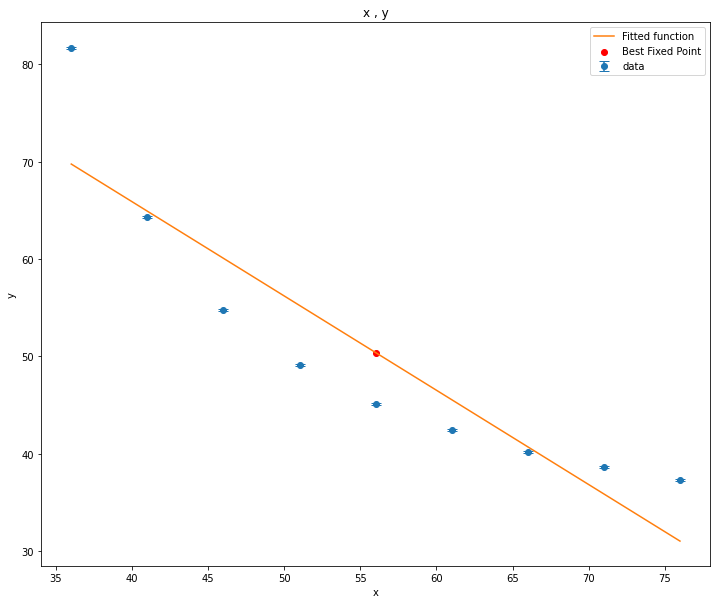

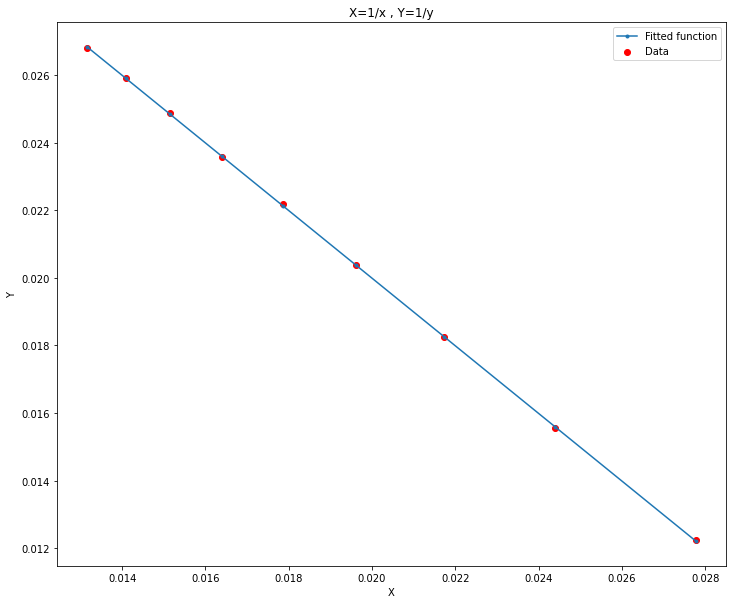

In [3]:
from scipy import optimize
import scipy
from scipy import *
import matplotlib.pyplot as plt

data = pd.read_csv('/data/data2.csv')
#print(data.describe())
x = np.array(data.iloc[:,0])

y = np.array(data.iloc[:,1])
alpha = np.array(data.iloc[:,2])
#print(data)
X=1/x
Y=1/y

def fi(x, m,c):
    return m*x+c


    
def truncate(f, n):
    return (math.floor(f * 10 ** n) / 10 ** n)

def two():
    gradient = 0
    gradient_error = 0
    intercept = 0
    intercept_error = 0
    

    popt, pcov = optimize.curve_fit(fi, x, y, sigma = alpha)
    
    poptCAPITAL, pcovCAPITAL = optimize.curve_fit(fi, X, Y, sigma = alpha)
   
    perr = np.sqrt(np.diag(pcov))
    gradient = popt[0]
    gradient_error = perr[0]
    intercept = popt[1]
    intercept_error = perr[1]
    #X and Y
    perrCAPITAL = np.sqrt(np.diag(pcovCAPITAL))
    gradientCAPITAL = poptCAPITAL[0]
    gradient_errorCAPITAL = perrCAPITAL[0]
    interceptCAPITAL = poptCAPITAL[1]
    intercept_errorCAPITAL = perrCAPITAL[1]

    return(gradient,gradient_error,intercept,intercept_error,gradientCAPITAL,gradient_errorCAPITAL,interceptCAPITAL,intercept_errorCAPITAL)

result=two()

gradient = float(result[0])
gradient_error=float(result[1])
intercept=float(result[2])
intercept_error=float(result[3])


gradientCAPITAL = float(result[4])
gradient_errorCAPITAL=float(result[5])
interceptCAPITAL=float(result[6])
intercept_errorCAPITAL=float(result[7])

y_intercept = intercept
y_intercept_error=intercept_error

x_intercept_plus = -float(y_intercept+intercept_error)/float(gradient+gradient_error)
x_intercept_minus = -float(y_intercept-intercept_error)/float(gradient-gradient_error)
x_intercept=(x_intercept_plus+x_intercept_minus)/2

x_intercept_error= x_intercept*np.sqrt((y_intercept_error/y_intercept)**2 + (gradient_error/gradient)**2 )

Y_intercept = interceptCAPITAL
Y_intercept_error=intercept_errorCAPITAL

X_intercept_plus = -float(Y_intercept+intercept_errorCAPITAL)/float(gradientCAPITAL+gradient_errorCAPITAL)
X_intercept_minus = -float(Y_intercept-intercept_errorCAPITAL)/float(gradientCAPITAL-gradient_errorCAPITAL)
X_intercept=(X_intercept_plus+X_intercept_minus)/2

X_intercept_error= X_intercept*np.sqrt((intercept_errorCAPITAL/Y_intercept)**2 + (gradient_errorCAPITAL/gradientCAPITAL)**2 )


#print(f'Slope: {gradient}', f'_ Slope Error: {gradient_error}', f'_ Intercept: {intercept}', f'_ Intercept Error: {intercept_error}')
print('(i):')
print(f'Slope: {"{:.1f}".format(gradient)}', f'and Slope Error: {"{:.1f}".format(gradient_error)}\n',
      
       f'Y-Intercept: {"{:.5f}".format(Y_intercept)}', f'and Y-Intercept Error: {"{:.5f}".format(Y_intercept_error)}\n',
       f'X-Intercept: {"{:.4f}".format(Y_intercept)}', f'and X-Intercept Error: {"{:.4f}".format(X_intercept_error)}\n', 
      f'y-Intercept: {"{:.1f}".format(y_intercept)}', f'and y-Intercept Error: {"{:.1f}".format(y_intercept_error)}\n', 
      f'x-Intercept {"{:.1f}".format(x_intercept)}',f'and x-Intercept error {"{:.1f}".format(x_intercept_error)}\n')


# Calculating f and its error for part (ii)

fx=1/X_intercept
f_alphax=np.abs(1/(X_intercept**2))*X_intercept_error #error on f


alphazplusx= np.abs((1/(X_intercept+X_intercept_error)) - (1/X_intercept))
alphazminusx= np.abs((1/X_intercept) - (1/(X_intercept-X_intercept_error)))
fxplus = fx+alphazplusx
fxminus = fx-alphazminusx



print(f'(ii): \n f is between {fxplus} and {fxminus}, AlphaF plus= {alphazplusx} and AlphaF minus= {alphazminusx}\n ')


print(f'--> F= {"{:.2f}".format(fx)} , and ErrorOnF= {"{:.2f}".format(f_alphax)}  or {"{:.2f}".format(fx)} ± {"{:.2f}".format(f_alphax)} cm \n')


# Calculating f and its error for part (iii)

fy=1/Y_intercept
f_alphay=np.abs(1/(Y_intercept**2))*Y_intercept_error #error on f

alphazplusy= np.abs((1/(Y_intercept+Y_intercept_error)) - (1/Y_intercept))
alphazminusy= np.abs((1/Y_intercept) - (1/(Y_intercept-y_intercept_error)))
fyplus = fy+alphazplusy
fyminus = fy-alphazminusy

print(f'(iii): \n f is between {fyplus} and {fyminus}, AlphaF plus= {alphazplusy} and AlphaF minus= {alphazminusy}\n ')

print(f'--> F= {"{:.2f}".format(fy)} , and ErrorOnF= {"{:.2f}".format(f_alphay)} or {"{:.2f}".format(fy)} ± {"{:.2f}".format(f_alphay)} cm \n')

f_error=((np.sqrt((1/(f_alphax**2)+(1/(f_alphay**2))))))
f_error=1/f_error
#print('final error on f',f_error)
print(f'(iv): We should qoute f = {"{:.2f}".format((fy+fx)/2)} ± {"{:.2f}".format((1/((np.sqrt((1/(f_alphax**2)+(1/(f_alphay**2))))))))} cm')




plt.figure(figsize=(12,10))
plt.title('x , y')
plt.errorbar(x,y, label = 'data', yerr=alpha,fmt='o', capsize=5)
plt.plot(x, fi(x, float(gradient), float(intercept)),label='Fitted function')
plt.scatter(np.sum(x)/len(x),np.sum(y)/len(y),color='red',alpha=1,label='Best Fixed Point')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(12,10))
plt.title('X=1/x , Y=1/y')
plt.scatter(X, Y, label='Data',color='red',alpha=1)
plt.plot(X, fi(X, float(gradientCAPITAL), float(interceptCAPITAL)),label='Fitted function',marker='.')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='best')
plt.show()

# print(f'Y-Intercept: {"{:.5f}".format(Y_intercept)}', f'and Y-Intercept Error: {"{:.5f}".format(Y_intercept_error)}\n')
# print(f'X-Intercept: {"{:.4f}".format(Y_intercept)}', f'and X-Intercept Error: {"{:.4f}".format(X_intercept_error)}\n')

## 3 $\chi^2$ minimisation for best-fit parameter

Another way to analyse the data in the previous question is by rewriting the equation as $\displaystyle{y=\frac{x\,f}{x-f}}$.
The theoretical value of $y$ can then be compared with the measured   value, and a $\chi^2$  analysis used to find the best value of the only parameter, $f$.

Perform a $\chi^2$ analysis.

> (i) What is the minimum value of $\chi^2$?

> (ii) Comment on the value of the minimum value of $\chi^2$.

> (iii) What is the best value of $f$, and its error?

> (iv) Comment on the relative merits of the two techniques (this question, and last question) for analysing the same data set.



  (i): Minimum Chisq = 8.3 
 (ii): Because it is close to number of degree of freedom, the model is in good agreement with the data 
       and the reduced-chi-squared is ≈ 1 , it means the fit is reasonable.

(iii): F=25.003 , F error =0.007

(iv): the error in F and discrepancy of residuals are less than previous and since the off-diagonal elemements of the error matrix are negative 
     (and therefore so are the values of the off-diagonal correlation matrix), the two variables are negatively correlated.
     The error on the intercept is much larger than the error on the gradient. Given that the errors in the y-data 
     are large relative to the negligible error in the x-data this is not surprising.

The off-Diagonal values:  -0.00037333333333333245 -0.00037333333333333245

slope error: 0.0025819888974716087 , intercept error=0.1483838865166219



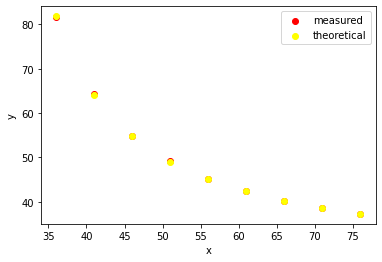

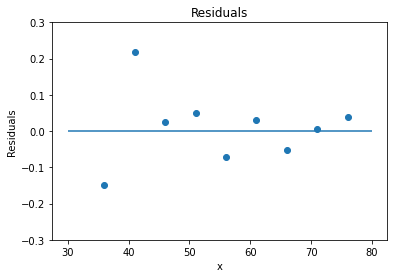

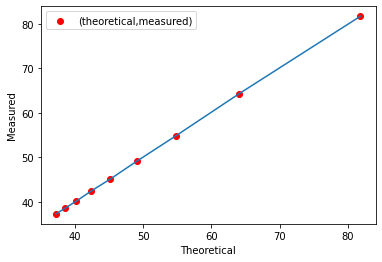

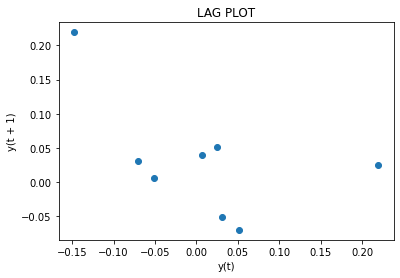

In [4]:
from scipy import optimize
import scipy
from scipy import *
import matplotlib.pyplot as plt
from scipy.stats import chisquare

data = pd.read_csv('/data/data2.csv')
x = np.array(data.iloc[:,0])
y = np.array(data.iloc[:,1])
alpha = np.array(data.iloc[:,2])

def fii(x,z):
    global y_new
    y_new=(x*z)/(x-z)
    
    return (x*z)/(x-z)

def three():
    
   
    guess = np.array([10])
    #guess = np.array([5.42,1.40,0.94,44.39])
    popt,pcov= curve_fit(fii,x,y,guess, sigma=alpha)
    
    f_iii=popt[0]
    f_iiierr=np.sqrt(pcov[0][0])
    

  
    return(f_iii,f_iiierr)

list=three()

    

Chi_min = np.sum((y-y_new)**2/(alpha)**2)
#Chi_min = np.sum(((y - y_new)/alpha)**2)
#Or we can use the scipy.optimize.minimize and we will get the same result.

#### def chisqfunc(z):
    
####     global y_new
####     y_new=(x*z)/(x-z)

####     chisq=np.sum(((y - y_new)/alpha)**2)
   
####     return chisq

#### x0 = np.array([10])

#### result =  minimize(chisqfunc, x0)

#### print(result.fun) = 8.3
#### print(result.x) = 25.003 = F

print(f'  (i): Minimum Chisq = {"{:.1f}".format(Chi_min)} ')

print(f' (ii): Because it is close to number of degree of freedom, the model is in good agreement with the data \n'
              f'       and the reduced-chi-squared is ≈ 1 , it means the fit is reasonable.\n')



print(f'(iii): F={"{:.3f}".format(list[0])} , F error ={"{:.3f}".format(list[1])}\n')


print(f'(iv): the error in F and discrepancy of residuals are less than previous and since the off-diagonal elemements of the error matrix are negative \n'
      f'     (and therefore so are the values of the off-diagonal correlation matrix), the two variables are negatively correlated.\n'
      f'     The error on the intercept is much larger than the error on the gradient. Given that the errors in the y-data \n'
      f'     are large relative to the negligible error in the x-data this is not surprising.\n')
      

a_cc = 0
a_cm = 0
a_mm = 0
for j,i in enumerate(x):
        alpha_i = alpha[j]
        a_cc += (1/(alpha_i**2))
        a_cm += (i/(alpha_i**2))
        a_mm += (i**2/(alpha_i**2))
a_mc = a_cm
curvature_matrix = np.matrix([[a_cc,a_cm],[a_mc,a_mm]])
error_matrix = curvature_matrix.I


print("The off-Diagonal values: ",error_matrix[0,1],error_matrix[1,0])
print(f'\nslope error: {np.sqrt(error_matrix[1,1])} , intercept error={np.sqrt(error_matrix[0,0])}\n')




#plt.figure(figsize=(15,12))
#plt.errorbar(x,y, label = 'errorbar', yerr=alpha,fmt='o', capsize=5,color='green')

plt.scatter(x,y,color='red',alpha=1,label='measured')
plt.scatter(x,y_new,color='yellow',label='theoretical')
#plt.plot(x,y_new,label='Model')

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')
plt.show()


residuals_three = (y-y_new)

#plt.figure(figsize=(8,6))
plt.scatter(x,residuals_three)

plt.ylim(-.3, .3)
plt.title("Residuals")
plt.hlines(0,30,80)
plt.ylabel("Residuals")
plt.xlabel("x")
plt.show()

#plt.figure(figsize=(8,6))
#plt.errorbar(x,y, label = 'errorbar', yerr=alpha,fmt='o', capsize=5,color='green')

plt.scatter(y_new,y,color='red',alpha=1,label='(theoretical,measured)')
plt.plot(y_new,y)

plt.xlabel("Theoretical")
plt.ylabel("Measured")
plt.legend(loc='best')
plt.show()


new_df3 = pd.DataFrame(residuals_three)
pandas.plotting.lag_plot(new_df3)
plt.title("LAG PLOT")
plt.show()

## 4 $\chi^2$ minimisation for best-fit parameters

The table below contains data collected during an experiment to measure the temperature, $T$, of an enclosure (and its error) as a function of time, $t$, after a source of heat is turned on at $t=0$.
The equation that describes the system for $t\ge0$  is $\displaystyle{T=a+b[1-\exp (-ct)]}$.

Perform a $\chi^2$ analysis.

> (i) What are the best values of $a$, $b$, and $c$ and their errors?

> (ii) Plot the graph of the temperature vs time, including the data and the best fit equation.

> (iii) Plot the residuals, and comment on their values.


(i):
 a=25.0 , a_error=0.3
 b=6.4 , b_error=0.2
 c=0.09 , c_error=0.01

(ii): Graph


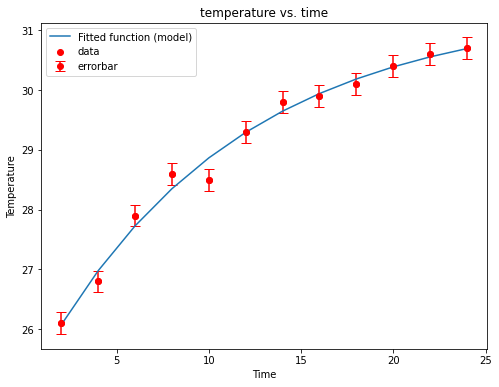

(iii): the residuals are structureless and consistent with the model, some of are above the line, some are underneath the line


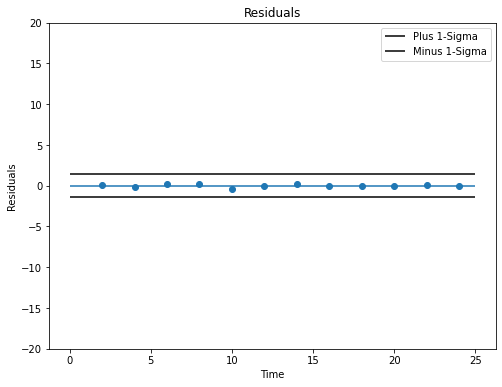

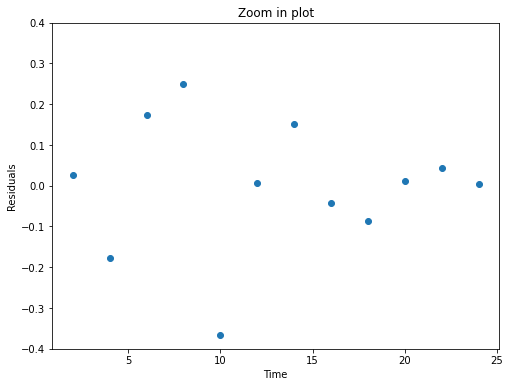

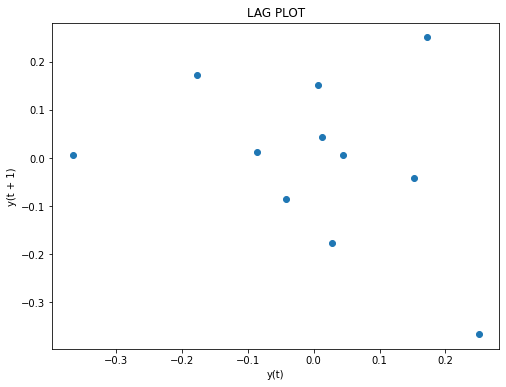

In [5]:
data = pd.read_csv('/data/data4.csv')
t = np.array(data.iloc[:,0])
T = np.array(data.iloc[:,1])
err = np.array(data.iloc[:,2])
#print(data)
a=0
b=0
c=0

def temp(t,a,b,c):
    global T_new
    T_new = a+b*(1-np.exp(-c*t))
    return a+b*(1-np.exp(-c*t))

def four():
    t = np.array(data.iloc[:,0])
    T = np.array(data.iloc[:,1])
    err = np.array(data.iloc[:,2])
    
   
    guess = np.array([20,10,1])
    #guess = np.array([5.42,1.40,0.94,44.39])
    popt,pcov= curve_fit(temp,t,T,guess , sigma=err)
    a=popt[0]
    b=popt[1]
    c=popt[2]
    a_err=np.sqrt(pcov[0][0])
    b_err=np.sqrt(pcov[1][1])
    c_err=np.sqrt(pcov[2][2])
  
    return(a,b,c,a_err,b_err,c_err)

list=four()

print("(i):")
print(f' a={"{:.1f}".format(list[0])} , a_error={"{:.1f}".format(list[3])}\n',
    f'b={"{:.1f}".format(list[1])} , b_error={"{:.1f}".format(list[4])}\n',
    f'c={"{:.2f}".format(list[2])} , c_error={"{:.2f}".format(list[5])}\n')





residuals_four = (T-T_new)
residuals_four_norm = ((T-T_new)/err)

print("(ii): Graph")
plt.figure(figsize=(8,6))
plt.errorbar(t,T, label = 'errorbar', yerr=err,fmt='o', capsize=5,color='red')

plt.scatter(t,T,color='red',alpha=1,label='data')
#plt.scatter(t,T_new,t,color='black',alpha=1)

plt.plot(t,T_new,label='Fitted function (model)')
plt.ylabel("Temperature")
plt.xlabel("Time")
plt.title("temperature vs. time")
plt.legend(loc='best')
plt.show()

T_std=np.std(T)
T_new_std=np.std(T_new)


print("(iii): the residuals are structureless and consistent with the model, some of are above the line, some are underneath the line")



plt.figure(figsize=(8,6))
plt.scatter(t,residuals_four)

plt.ylim(-20, 20)
plt.title("Residuals")
plt.hlines(0,0,25)
plt.hlines(T_std,0,25,color='black',label='Plus 1-Sigma')
plt.hlines(-T_std,0,25,color='black',label='Minus 1-Sigma')
plt.ylabel("Residuals")
plt.xlabel("Time")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(t,residuals_four)

plt.ylim(-.4, .4)
plt.title("Zoom in plot")
plt.ylabel("Residuals")
plt.xlabel("Time")
plt.show()


plt.figure(figsize=(8,6))
new_df = pd.DataFrame(residuals_four)
pandas.plotting.lag_plot(new_df)
plt.title("LAG PLOT")
plt.show()